In [ ]:
# import various libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.dates as mdates
import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Update params
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

## **Data import and customization**


In [2]:
ind = DstApi('AUKS02') 
ind2 = DstApi('AULK01')
ind3 = DstApi('FOLK1A')

**First dataset**

In [3]:
tabsum = ind.tablesummary(language='en')

for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))

Table AUKS02: Persons receiving public benefits (Seasonally adjusted) by type of benefits, sex, age and time
Last update: 2024-03-18T08:00:00
YDELSESTYPE:


,id,text
0,TOT,Total
1,TOTUSU,Total without Danish State Education Grant and...
2,SU,Danish State Education Grant and Loan Scheme A...


KØN:


,id,text
0,TOT,Total
1,M,Men
2,K,Women


ALDER:


,id,text
0,TOT,"Age, total"
1,16-24,16-24 years
2,25-29,25-29 years
3,30-39,30-39 years
4,40-49,40-49 years
5,50-59,50-59 years
6,6099,60 year and over


Tid:


,id,text
0,2007K1,2007Q1
1,2007K2,2007Q2
2,2007K3,2007Q3
3,2007K4,2007Q4
4,2008K1,2008Q1
...,...,...
63,2022K4,2022Q4
64,2023K1,2023Q1
65,2023K2,2023Q2
66,2023K3,2023Q3


In [4]:
params = ind._define_base_params(language='en')
params

variables = params['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['TOTUSU']
variables[1]['values'] =['M','K','TOT']
variables[2]['values'] = ['16-24','25-29','30-39','40-49','50-59','6099']
variables[3]['values'] = ['*']
params

inc_api = ind.get_data(params=params)
inc_api.head(5)

inc_api.sort_values(by=['YDELSESTYPE', 'KØN', 'TID'], inplace=True)
inc_api.head(5)

,YDELSESTYPE,KØN,ALDER,TID,INDHOLD
654,Total without Danish State Education Grant and...,Men,16-24 years,2007Q1,14205
655,Total without Danish State Education Grant and...,Men,25-29 years,2007Q1,19431
656,Total without Danish State Education Grant and...,Men,30-39 years,2007Q1,50571
657,Total without Danish State Education Grant and...,Men,40-49 years,2007Q1,62727
658,Total without Danish State Education Grant and...,Men,50-59 years,2007Q1,77905


**Second Dataset**

In [5]:
tabsum = ind2.tablesummary(language='en')

for variable in tabsum['variable name']:
    print(variable+':')
    display(ind2.variable_levels(variable, language='en'))

Table AULK01: Full-time unemployed persons by region, type of benefits, unemployment insurance fund, age, sex and time
Last update: 2024-03-18T08:00:00
OMRÅDE:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,01,Province Byen København
3,101,Copenhagen
4,147,Frederiksberg
...,...,...
112,787,Thisted
113,820,Vesthimmerlands
114,851,Aalborg
115,998,Unknown municipality


YDELSESTYPE:


,id,text
0,TOT,Gross unemployment
1,LDP,Net unemployed recipients of unemployment bene...
2,LKT,Net unemployed recipients of social assistance
3,ADP,Activation of persons on unemployment benefits
4,AKT,Activation of persons on social assistance (pr...


AKASSE:


,id,text
0,TOT,Total
1,48,Akademikernes (fra 1. juli 2013 inkl. ingeniører)
2,46,Din Faglige A-kasse (fra 1. januar 2021 inkl. ...
3,05,Børne- og Ungdomspædagoger (BUPL-A)
4,06,Din Sundhedsfaglige A-kasse (DSA)
5,40,Det Faglige Hus A-kasse
6,44,Fag og Arbejde (FOA)
7,43,Faglig Fælles a-kasse (3F)
8,11,A-kassen Frie (fra 1. januar 2020 inkl. DANA)
9,13,Funktionærer og Tjenestemænd (FTF-A)


ALDER:


,id,text
0,TOT,"Age, total"
1,16-24,16-24 years
2,25-29,25-29 years
3,30-34,30-34 years
4,35-39,35-39 years
5,40-44,40-44 years
6,45-49,45-49 years
7,50-54,50-54 years
8,55-59,55-59 years
9,6099,60 year and over


KØN:


,id,text
0,TOT,Total
1,M,Men
2,K,Women


Tid:


,id,text
0,2007K1,2007Q1
1,2007K2,2007Q2
2,2007K3,2007Q3
3,2007K4,2007Q4
4,2008K1,2008Q1
...,...,...
63,2022K4,2022Q4
64,2023K1,2023Q1
65,2023K2,2023Q2
66,2023K3,2023Q3


## **THIS BIT OF CODE TAKES QUITE A BIT OF TIME TO RUN**

In [6]:
params = ind2._define_base_params(language='en')
params

variables = params['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['*']
variables[1]['values'] = ['TOT']
variables[2]['values'] = ['TOT']
variables[3]['values'] = ['*']
variables[4]['values'] =['M','K','TOT']
variables[5]['values'] = ['*']
params

inc2_api = ind2.get_data(params=params)
inc2_api.head(7)

inc2_api.sort_values(by=['OMRÅDE', 'YDELSESTYPE', 'AKASSE', 'KØN', 'TID'], inplace=True)
inc2_api.head(7)

,OMRÅDE,YDELSESTYPE,AKASSE,ALDER,KØN,TID,INDHOLD
59705,Aabenraa,Gross unemployment,Total,"Age, total",Men,2007Q1,547
59708,Aabenraa,Gross unemployment,Total,16-24 years,Men,2007Q1,47
59711,Aabenraa,Gross unemployment,Total,25-29 years,Men,2007Q1,58
59714,Aabenraa,Gross unemployment,Total,30-34 years,Men,2007Q1,50
59717,Aabenraa,Gross unemployment,Total,35-39 years,Men,2007Q1,49
59720,Aabenraa,Gross unemployment,Total,40-44 years,Men,2007Q1,57
59723,Aabenraa,Gross unemployment,Total,45-49 years,Men,2007Q1,69


**Third Dataset**

In [7]:
tabsum = ind3.tablesummary(language='en')

for variable in tabsum['variable name']:
    print(variable+':')
    display(ind3.variable_levels(variable, language='en'))

Table FOLK1A: Population at the first day of the quarter by region, sex, age, marital status and time
Last update: 2024-02-12T08:00:00
OMRÅDE:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,101,Copenhagen
3,147,Frederiksberg
4,155,Dragør
...,...,...
100,773,Morsø
101,840,Rebild
102,787,Thisted
103,820,Vesthimmerlands


KØN:


,id,text
0,TOT,Total
1,1,Men
2,2,Women


ALDER:


,id,text
0,IALT,"Age, total"
1,0,0 years
2,1,1 year
3,2,2 years
4,3,3 years
...,...,...
122,121,121 years
123,122,122 years
124,123,123 years
125,124,124 years


CIVILSTAND:


,id,text
0,TOT,Total
1,U,Never married
2,G,Married/separated
3,E,Widowed
4,F,Divorced


Tid:


,id,text
0,2008K1,2008Q1
1,2008K2,2008Q2
2,2008K3,2008Q3
3,2008K4,2008Q4
4,2009K1,2009Q1
...,...,...
60,2023K1,2023Q1
61,2023K2,2023Q2
62,2023K3,2023Q3
63,2023K4,2023Q4


In [8]:
params = ind3._define_base_params(language='en')
params

variables = params['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['*']
variables[1]['values'] = ['*']
variables[2]['values'] = ['IALT']
variables[3]['values'] = ['TOT']
variables[4]['values'] =['*']
params

inc3_api = ind3.get_data(params=params)
inc3_api.head(6)

inc3_api.sort_values(by=['OMRÅDE', 'KØN', 'ALDER', 'CIVILSTAND', 'TID'], inplace=True)
inc3_api.head(6)

,OMRÅDE,KØN,ALDER,CIVILSTAND,TID,INDHOLD
13722,Aabenraa,Men,"Age, total",Total,2008Q1,29992
1145,Aabenraa,Men,"Age, total",Total,2008Q2,30032
13851,Aabenraa,Men,"Age, total",Total,2008Q3,30084
5960,Aabenraa,Men,"Age, total",Total,2008Q4,30078
1206,Aabenraa,Men,"Age, total",Total,2009Q1,30107
10518,Aabenraa,Men,"Age, total",Total,2009Q2,30041


**Data analysis**

The first dataset contains observations for the amount of people receiving government grants. In the data filtering, the amount of grants without SU has been selected. Now, plotting we can observe the amount of men and women in different age groups receiving government grants without SU, for the periods from Q1 2007 untill Q1 2024:

In [10]:
# List of unique age groups
age_groups = inc_api['ALDER'].unique().tolist()
age_groups.sort() 

# Function to update plot based on selected age group
def update_plot(age_group):
    plt.clf()  # Clear the current figure
    # Filter data for selected age group and for Men
    data_men = inc_api[(inc_api['KØN'] == 'Men') & (inc_api['ALDER'] == age_group)]
    # Filter data for selected age group and for Women
    data_women = inc_api[(inc_api['KØN'] == 'Women') & (inc_api['ALDER'] == age_group)]
    
    # Check if there is data to plot to avoid errors
    if not data_men.empty:
        plt.plot(data_men['TID'], data_men['INDHOLD'], marker='o', linestyle='-', color='blue', label='Mænd')
    if not data_women.empty:
        plt.plot(data_women['TID'], data_women['INDHOLD'], marker='o', linestyle='-', color='red', label='Kvinder')
    
    plt.legend()

    # Customize x-axis labels to skip 3 labels
    all_labels = data_men['TID'].tolist()  # Assuming 'TID' labels are the same for men and women
    plt.xticks(ticks=all_labels[::4], labels=all_labels[::4], rotation=45)  # Select every fourth label

    plt.title(f'Observations for Men and Women aged {age_group}')
    plt.xlabel('TID')
    plt.ylabel('INDHOLD')
    plt.show()

# Create a dropdown widget for age groups
age_group_selector = widgets.Dropdown(
    options=age_groups,
    value=age_groups[0],  # Default value
    description='Age Group:',
)

# Create an interactive widget
widgets.interactive(update_plot, age_group=age_group_selector)

interactive(children=(Dropdown(description='Age Group:', options=('16-24 years', '25-29 years', '30-39 years',…

Observing that for the age group 16-24 the two genders overlap for the most part of the time, with there even being more men on government grants in some periods. For the rest of the age groups there is quite big inequality with the majority of government grant receivers being women. Now there are mulitple explanations for this, since there exist a lot of different government grants, such as maternity pay, unemployment benefits and pensions. For the sake of moving forward, it would be interesting to also see the amount of unemployed people between the two genders. The selected dataset also filters on location.

In [11]:
age_groups = sorted(inc2_api['ALDER'].unique().tolist())
areas = sorted(inc2_api['OMRÅDE'].unique().tolist())

def update_plot(age_group, area):
    plt.clf()  # Clear the current figure
    # Filter data for the selected age group and area, for Men
    data_men = inc2_api[(inc2_api['KØN'] == 'Men') & (inc2_api['ALDER'] == age_group) & (inc2_api['OMRÅDE'] == area)]
    # Filter data for the selected age group and area, for Women
    data_women = inc2_api[(inc2_api['KØN'] == 'Women') & (inc2_api['ALDER'] == age_group) & (inc2_api['OMRÅDE'] == area)]
    
    # Check if there is data to plot to avoid errors
    if not data_men.empty:
        plt.plot(data_men['TID'], data_men['INDHOLD'], marker='o', linestyle='-', color='blue', label='Men')
    if not data_women.empty:
        plt.plot(data_women['TID'], data_women['INDHOLD'], marker='o', linestyle='-', color='red', label='Women')
    
    plt.legend()

    # Customize x-axis labels to skip 3 labels
    all_labels = data_men['TID'].tolist()  # Assuming 'TID' labels are the same for men and women
    plt.xticks(ticks=all_labels[::4], labels=all_labels[::4], rotation=45)  # Select every fourth label
    
    plt.title(f'Observations for Men and Women in {area}, age {age_group}')
    plt.xlabel('TID')
    plt.ylabel('INDHOLD')
    plt.show()

# Create dropdown widgets for age groups and areas
age_group_selector = widgets.Dropdown(options=age_groups, description='Age Group:')
area_selector = widgets.Dropdown(options=areas, description='OMRÅDE:')

# Use widgets.interactive to create interactive plot with the dropdowns
widgets.interactive(update_plot, age_group=age_group_selector, area=area_selector)


interactive(children=(Dropdown(description='Age Group:', options=('16-24 years', '25-29 years', '30-34 years',…

Seeing that when "All Denmark" for "All ages" is chosen, the unemployed for men and women is very similar apart from the period in and just after the financial crisis of 2009, where the unemployed men skyrockets in comparison to women. Before the financial crisis it is also seen that men were less unemployed than women. Flicking through all the other areas of Denmark, it can be seen that the unemployment is not necesarrily equal across all areas. For further analysis, we will take a look at where there has been the biggest difference between the gender in regards to unemployment, on average, during the time series.

Firstly, to have a more comparable picture the data will be calculated to shares of unemployment in each area instead of amount of unemployed people.

In [12]:
# Filter out rows where 'KØN' is 'Total'
filtered_data = inc2_api[inc2_api['KØN'] != 'Total']

# Group by 'OMRÅDE' and 'KØN' (after filtering out 'Total') and sum observations
grouped_data = filtered_data.groupby(['OMRÅDE', 'KØN'])['INDHOLD'].sum().reset_index()

# Calculate total observations in each 'OMRÅDE' by including only gender-specific rows
total_by_area = filtered_data.groupby('OMRÅDE')['INDHOLD'].sum().reset_index(name='Total')

# Merge the grouped data with the total observations to calculate shares
merged_data = pd.merge(grouped_data, total_by_area, on='OMRÅDE')

# Calculate the share of each gender in each 'OMRÅDE'
merged_data['Share'] = (merged_data['INDHOLD'] / merged_data['Total']) * 100

# Final dataset to include 'OMRÅDE', 'KØN', and 'Share'
final_dataset = merged_data[['OMRÅDE', 'KØN', 'Share']]

Now having calculated the unemployment share for the genders across all the areas included in the dataset, we can see which areas on average during the whole time series has had the biggest difference in unemployment shares, here showing the top 10 areas.

In [13]:
pivot_df = final_dataset.pivot(index='OMRÅDE', columns='KØN', values='Share')

# Calculate the absolute difference in shares between Men and Women for each area
pivot_df['Difference'] = (pivot_df['Men'] - pivot_df['Women']).abs()

# Identify the area(s) with the biggest difference and sort
sorted_df = pivot_df.sort_values(by='Difference', ascending=False)


# Display the top 10 areas with the biggest difference
top_10_areas = sorted_df.head(10)
print("The top 10 areas with the biggest difference in shares between Men and Women are:")
print(top_10_areas[['Men', 'Women', 'Difference']])

print("Names of the top 10 areas with the biggest difference in shares:")
print(top_10_areas.index.tolist())

The top 10 areas with the biggest difference in shares between Men and Women are:
KØN                 Men      Women  Difference
OMRÅDE                                        
Langeland     58.991199  41.008801   17.982398
Lolland       58.659575  41.340425   17.319150
Abroad        56.328322  43.671678   12.656644
Guldborgsund  55.827164  44.172836   11.654328
Ærø           55.471698  44.528302   10.943396
Skive         55.145931  44.854069   10.291862
Kerteminde    54.641065  45.358935    9.282129
Sønderborg    54.584399  45.415601    9.168797
Læsø          54.339976  45.660024    8.679952
Esbjerg       54.303806  45.696194    8.607611
Names of the top 10 areas with the biggest difference in shares:
['Langeland', 'Lolland', 'Abroad', 'Guldborgsund', 'Ærø', 'Skive', 'Kerteminde', 'Sønderborg', 'Læsø', 'Esbjerg']


For further analysis we want to look at only the last time period, thus, the same calculation and sorting will be done but only considering observations in Q4 2023.

In [22]:


# Identify the most recent observation period in 'TID'
most_recent_tid = inc2_api['TID'].max()

# Filter the dataset for only the most recent observation period
latest_data = inc2_api[inc2_api['TID'] == most_recent_tid]

# Filter out rows where 'KØN' is 'Total'
filtered_latest_data = latest_data[latest_data['KØN'] != 'Total']

# Group by 'OMRÅDE' and 'KØN', then sum up observations
grouped_data = filtered_latest_data.groupby(['OMRÅDE', 'KØN'])['INDHOLD'].sum().reset_index()

# Calculate the total observations in each 'OMRÅDE'
total_by_area = filtered_latest_data.groupby('OMRÅDE')['INDHOLD'].sum().reset_index(name='Total')

# Merge and calculate shares
merged_data = pd.merge(grouped_data, total_by_area, on='OMRÅDE')
merged_data['Share'] = (merged_data['INDHOLD'] / merged_data['Total']) * 100

# Pivot the data to get 'Men' and 'Women' shares by 'OMRÅDE'
pivot_df = merged_data.pivot(index='OMRÅDE', columns='KØN', values='Share')

# Assuming your categories are 'Men' and 'Women', adjust if they are named differently
pivot_df['Difference'] = (pivot_df.get('Men', 0) - pivot_df.get('Women', 0)).abs()

# Sort by the biggest difference
sorted_df = pivot_df.sort_values(by='Difference', ascending=False)

# Display the top 10 areas with the biggest difference for the most recent period
top_10_areas_recent = sorted_df.head(10)
print(f"Top 10 areas with the biggest difference in shares between Men and Women for the most recent period ({most_recent_tid}):")
print(top_10_areas_recent[['Men', 'Women', 'Difference']])


Top 10 areas with the biggest difference in shares between Men and Women for the most recent period (2023Q4):
KØN                Men      Women  Difference
OMRÅDE                                       
Ærø          63.414634  36.585366   26.829268
Fanø         39.344262  60.655738   21.311475
Hørsholm     40.476190  59.523810   19.047619
Samsø        41.111111  58.888889   17.777778
Dragør       41.350211  58.649789   17.299578
Thisted      58.318426  41.681574   16.636852
Skanderborg  41.810700  58.189300   16.378601
Morsø        56.842105  43.157895   13.684211
Skive        56.779661  43.220339   13.559322
Gentofte     43.249847  56.750153   13.500305


The areas with the biggest differences in unemployment share are thus very different. One such way they are different is the population in the given areas. Using the 3rd extracted dataset we can shows this difference together:

/var/folders/1d/nwv18dkn6y91kj5gfjq048280000gn/T/ipykernel_34212/2939852697.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_population.rename(columns={'area': 'OMRÅDE'}, inplace=True)


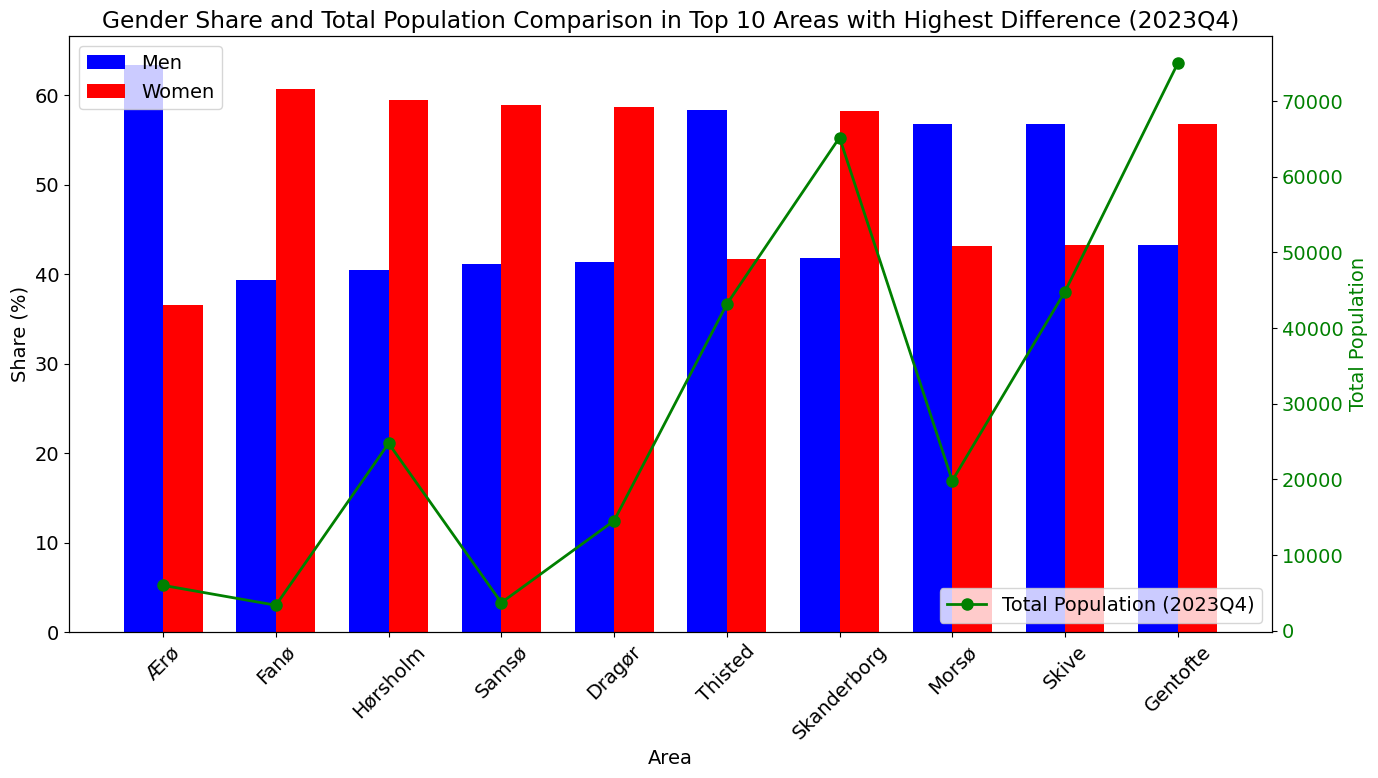

In [23]:
filtered_population = inc3_api[
    (inc3_api['KØN'] == 'Total') & 
    (inc3_api['ALDER'] == 'Age, total') & 
    (inc3_api['CIVILSTAND'] == 'Total') & 
    (inc3_api['TID'] == '2023Q4')
]


# Renaming 'area' to 'OMRÅDE' in filtered_population for consistent merging
filtered_population.rename(columns={'area': 'OMRÅDE'}, inplace=True)

# Merge based on 'OMRÅDE', keeping all rows from top_10_areas_recent
merged_data = pd.merge(top_10_areas_recent, filtered_population[['OMRÅDE', 'INDHOLD']], on='OMRÅDE', how='left')

bar_width = 0.35
r1 = np.arange(len(merged_data))
r2 = [x + bar_width for x in r1]

population_points_x = [x + bar_width / 2 for x in r1]

plt.figure(figsize=(14, 8))


ax1 = plt.gca()
ax1.bar(r1, merged_data['Men'], color='blue', width=bar_width, label='Men')
ax1.bar(r2, merged_data['Women'], color='red', width=bar_width, label='Women')
ax1.set_xlabel('Area')
ax1.set_ylabel('Share (%)')
ax1.set_xticks([r + bar_width / 2 for r in range(len(merged_data))])
ax1.set_xticklabels(merged_data['OMRÅDE'], rotation=45)
ax1.legend(loc='upper left')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(population_points_x, merged_data['INDHOLD'], color='green', marker='o', linestyle='-', linewidth=2, markersize=8, label='Total Population (2023Q4)')
ax2.set_ylabel('Total Population', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='lower right')
ax2.grid(False)

plt.title('Gender Share and Total Population Comparison in Top 10 Areas with Highest Difference (2023Q4)')
plt.tight_layout()
plt.grid(False)

plt.show()